## Proyecto 2

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import math as mt

In [2]:
def rk4(f,x,t,dt,p):
    """
    Calcula un paso de integración del método de Runge Kutta orden 4.
    
    Argumentos de entrada:
    
        f : R^n -> R^n
        x = x(t) : R^n
        t = tiempo : R
        dt = paso de tiempo : R
        p = parametros : R^q        
        
    Retorna aproximacion numérica de
    
        x(t+dt) : R^n

    # Ejemplos:
    """    
    k1 = f(x,t,p)
    k2 = f(x+0.5*dt*k1,t+0.5*dt,p)
    k3 = f(x+0.5*dt*k2,t+0.5*dt,p)
    k4 = f(x+dt*k3,t+dt,p)
    return x+dt*(k1+2.0*k2+2.0*k3+k4)/6.0

In [3]:
def integrador_ode(m,f,x0,a,b,k,p):
    """
    Integra numéricamente la ODE
    
        dx/dt = f(x,t)
        
    sobre el intervalo t:[a,b] usando k pasos de integración y el método m, bajo condicion inicial x(a)=x0.
    No es necesario que a<b.
    
    Argumentos de entrada:
    
        m = metodo de integracion (ej. euler, rk2, etc.)
        f : R^n -> R^n
        x0 = condicion inicial : R
        a = tiempo inicial : R
        b = tiempo final : R
        k = num. pasos de integracion : N
        p = parametros : R^q        
    
    Retorna:
    
        t : R^{k+1} , t_j = a+j*dt para j=0,1,...,k
        x : R^{k+1,n} , x_ij = x_i(t_j) para i=0,1,...,n-1 y j=0,1,...,k
        
    donde a+k*dt = b.
    """  
    assert k>0
    n = len(x0)
    dt = (b-a)/k
    x = np.zeros((n,k+1))
    t = np.zeros(k+1)
    x[:,0] = x0
    t[0] = a
    for j in range(k):
        t[j+1] = t[j] + dt
        x[:,j+1] = m(f,x[:,j],t[j],dt,p)
        if x[0,j+1] >= p[0]:
            x[0,j+1] = p[1]
            x[1,j+1] = x[1,j+1]+p[2]
    return t,x

Tenemos las siguientes ecuaciones diferenciales acopladas:
$$
\dot v = 0,04 v^2 + 5v +140 -u +I \\
\dot u = a(bv-u)
$$
y en el momento del disparo ($v(t) > 30~mV$):
$$
v(t) \rightarrow c \\
u(t) \rightarrow u(t) + d
$$

In [4]:
# Defino las funciones de las ecuaciones:
def v_punto(v,u):
    return 0.04*(v^2)+5*v+140-u+I
def u_punto(v,u):
    return a*(bv-u)

In [5]:
# Defino los parámetros para los disparos
#p = [30,c,u+d]
# con p=[potencial umbral,vuelta de disparo de v, vuelta de disparo de u]
# En el paper se usa:
I = 10

Esto dice en el paper:

v=-65*ones(2,1);   % Initial values of v
u=b.*v;                % Initial values of u

he part
was obtained by fitting the spike initiation
dynamics of a cortical neuron (other choices also feasible) so that the
membrane potential has
scale and the time has
scale. The resting potential in the model is between -70 and -60 mV depending
on the value of d. As most real neurons, the model does not have a fixed
threshold; Depending on the history of the membrane potential prior to
the spike, the threshold potential can be as low as 55 mV or as high
as 40 mV.

The parameter describes the time scale of the recovery variable
u. Smaller values result in slower recovery. A typical value is
a = 0.02.

In [6]:
#def v_punto(v,u):
#    return 0.04*(v^2)+5*v+140-u+I
#def u_punto(v,u):
#    return a*(bv-u)
def funciones(x,t,p):
    return np.array([(0.04*(x[0]**2)+5*x[0]+140-x[1]+I(t)) , (a*(b*x[0]-x[1]))])
    
# x[0]=v, x[1]=u 

In [7]:
def I(t):
    if t> 10:
        return 10
    else:
        return 0

In [8]:
# probamos parámetros estandar:
a=0.02
b=0.2
c=-65
d=8
i=10
p = np.array([30,c,d])
x0 = np.array([c,b*c])
f = funciones
t,x = integrador_ode(rk4,f,x0,0,200,1000,p)

In [132]:
#RS figura 1:
def I1(t):
    if t> 10:
        return 10
    else:
        return 0

a=0.02
b=0.2
c=-65
d=8
def funciones(x,t,p):
    return np.array([(0.04*(x[0]**2)+5*x[0]+140-x[1]+I1(t)) , (a*(b*x[0]-x[1]))])
f = funciones
p = np.array([30,c,d])
x0 = np.array([-70,b*(-70)])
t1,x1 = integrador_ode(rk4,f,x0,0,200,1000,p)

In [134]:
#BI Figura 2:
def I2(t):
    if t> 10:
        return 10
    else:
        return 0

a=0.02
b=0.2
c=-55
d=4
def funciones(x,t,p):
    return np.array([(0.04*(x[0]**2)+5*x[0]+140-x[1]+I2(t)) , (a*(b*x[0]-x[1]))])
f = funciones
p = np.array([30,c,d])
x0 = np.array([-70,b*(-70)])
t2,x2 = integrador_ode(rk4,f,x0,0,200,1000,p)

In [142]:
#CH Figura 3:
def I3(t):
    if t> 10:
        return 10
    else:
        return 0

a=0.02
b=0.25
c=-50
d=2
def funciones(x,t,p):
    return np.array([(0.04*(x[0]**2)+5*x[0]+140-x[1]+I3(t)) , (a*(b*x[0]-x[1]))])
f = funciones
p = np.array([30,c,d])
x0 = np.array([-70,b*-70])
t3,x3 = integrador_ode(rk4,f,x0,0,200,1000,p)

In [149]:
#FS Figura 4:
def I4(t):
    if t> 10:
        return 10
    else:
        return 0

a=0.1
b=0.2
c=-65
d=2
def funciones(x,t,p):
    return np.array([(0.04*(x[0]**2)+5*x[0]+140-x[1]+I4(t)) , (a*(b*x[0]-x[1]))])
f = funciones
p = np.array([30,c,d])
x0 = np.array([-70,b*(-70)])
t4,x4 = integrador_ode(rk4,f,x0,0,200,1000,p)

In [181]:
#TC Figura 5:
def I5(t):
    if t> 20:
        return  1
    else:
        return -0.3

a=0.02
b=0.25
c=-65
d=0.05
def funciones(x,t,p):
    return np.array([(0.04*(x[0]**2)+5*x[0]+140-x[1]+I5(t)) , (a*(b*x[0]-x[1]))])
f = funciones
p = np.array([30,c,d])
x0 = np.array([-65,b*(-65)])
t5,x5 = integrador_ode(rk4,f,x0,0,200,1000,p)

In [182]:
#TC Figura 6:
def I6(t):
    if t> 20:
        return 0.65
    else:
        return -10

a=0.02
b=0.25
c=-65
d=0.05
def funciones(x,t,p):
    return np.array([(0.04*(x[0]**2)+5*x[0]+140-x[1]+I6(t)) , (a*(b*x[0]-x[1]))])
f = funciones
p = np.array([30,c,d])
x0 = np.array([-78,b*(-78)])
t6,x6 = integrador_ode(rk4,f,x0,0,200,1000,p)

In [183]:
#TC Figura 7:
def I7(t):
    if (t > 100) and (t<102):
        return 2
    elif t> 20:
        return 0.2
    else:
        return -0.1
a=0.1
b=0.26
c=-65
d=2
def funciones(x,t,p):
    return np.array([(0.04*(x[0]**2)+5*x[0]+140-x[1]+I7(t)) , (a*(b*x[0]-x[1]))])
f = funciones
p = np.array([30,c,d])
x0 = np.array([c,c*b])
t7,x7 = integrador_ode(rk4,f,x0,0,200,1000,p)

In [184]:
#TC Figura 8:
def I8(t):
    if t> 20:
        return 10
    else:
        return 0
a=0.02
b=0.25
c=-65
d=2
def funciones(x,t,p):
    return np.array([(0.04*(x[0]**2)+5*x[0]+140-x[1]+I8(t)) , (a*(b*x[0]-x[1]))])
f = funciones
p = np.array([30,c,d])
x0 = np.array([-64,(-64)*b])
t8,x8 = integrador_ode(rk4,f,x0,0,200,1000,p)

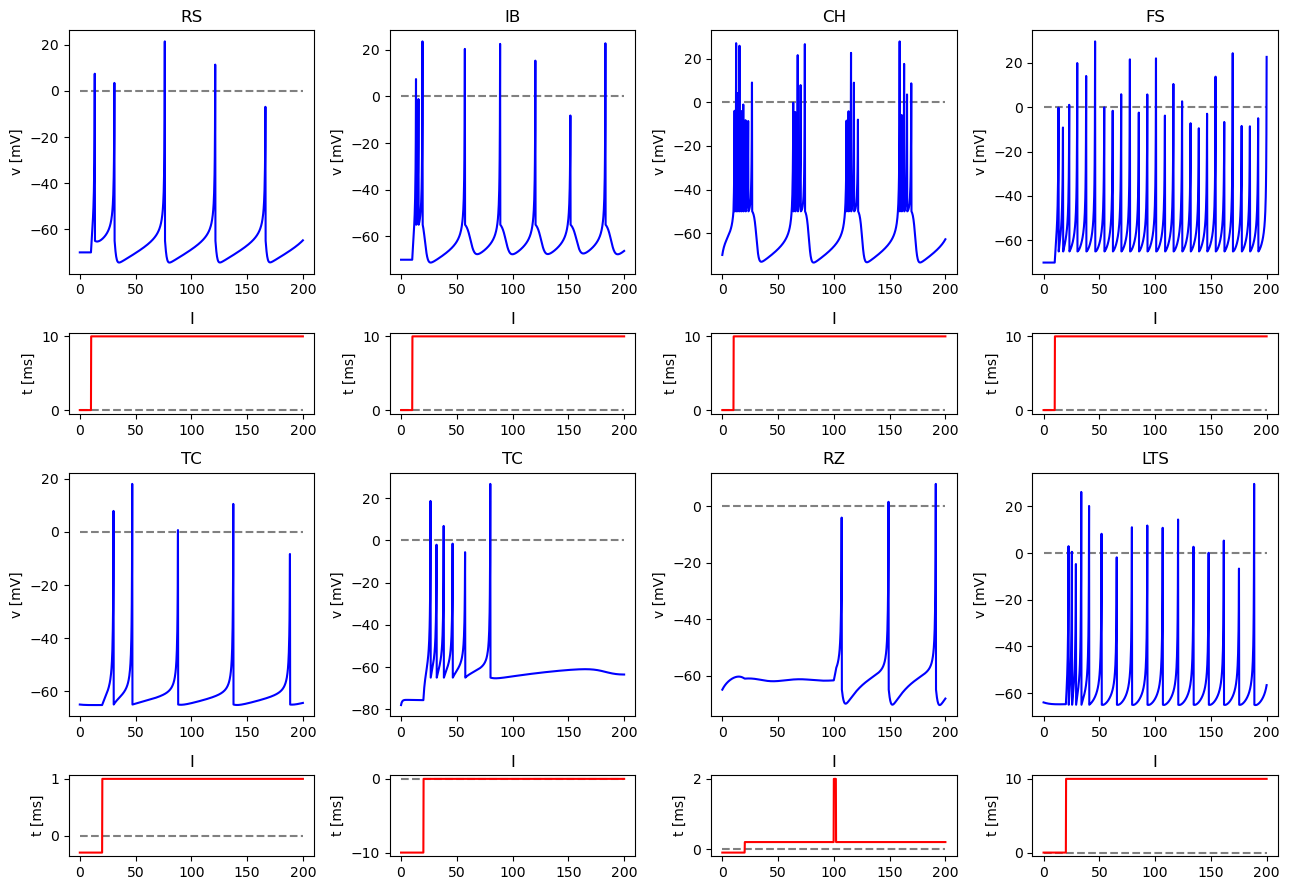

In [185]:
fig,axes=plt.subplots(4,4,gridspec_kw={'height_ratios':[3,1,3,1]})
fig.set_size_inches(13.0,9.0)

#Grupo figura 1:
ar,ac=0,0
axes[ar,ac].plot(t1,np.zeros(len(t1)),color='gray',linestyle='--')
axes[ar,ac].plot(t1,x1[0,:],color='b',label='v [mV]')
axes[ar,ac].set_ylabel("v [mV]")
axes[ar,ac].set_title("RS")

ar,ac=1,0
axes[ar,ac].plot(t1,np.zeros(len(t1)),color='gray',linestyle='--')
axes[ar,ac].plot(t1,np.vectorize(I1)(t),color='r',label='I')
axes[ar,ac].set_ylabel("t [ms]")
axes[ar,ac].set_title("I")

#Grupo figura 2:

ar,ac=0,1
axes[ar,ac].plot(t2,np.zeros(len(t2)),color='gray',linestyle='--')
axes[ar,ac].plot(t2,x2[0,:],color='b',label='v [mV]')
axes[ar,ac].set_ylabel("v [mV]")
axes[ar,ac].set_title("IB")

ar,ac=1,1
axes[ar,ac].plot(t2,np.zeros(len(t2)),color='gray',linestyle='--')
axes[ar,ac].plot(t2,np.vectorize(I2)(t),color='r',label='I')
axes[ar,ac].set_ylabel("t [ms]")
axes[ar,ac].set_title("I")


#Grupo figura 3:

ar,ac=0,2
axes[ar,ac].plot(t3,np.zeros(len(t3)),color='gray',linestyle='--')
axes[ar,ac].plot(t3,x3[0,:],color='b',label='v [mV]')
axes[ar,ac].set_ylabel("v [mV]")
axes[ar,ac].set_title("CH")

ar,ac=1,2
axes[ar,ac].plot(t3,np.zeros(len(t3)),color='gray',linestyle='--')
axes[ar,ac].plot(t3,np.vectorize(I3)(t),color='r',label='I')
axes[ar,ac].set_ylabel("t [ms]")
axes[ar,ac].set_title("I")

#Grupo figura 4:

ar,ac=0,3
axes[ar,ac].plot(t4,np.zeros(len(t4)),color='gray',linestyle='--')
axes[ar,ac].plot(t4,x4[0,:],color='b',label='v [mV]')
axes[ar,ac].set_ylabel("v [mV]")
axes[ar,ac].set_title("FS")

ar,ac=1,3
axes[ar,ac].plot(t4,np.zeros(len(t4)),color='gray',linestyle='--')
axes[ar,ac].plot(t4,np.vectorize(I4)(t),color='r',label='I')
axes[ar,ac].set_ylabel("t [ms]")
axes[ar,ac].set_title("I")


#Grupo figura 5:

ar,ac=2,0
axes[ar,ac].plot(t5,np.zeros(len(t5)),color='gray',linestyle='--')
axes[ar,ac].plot(t5,x5[0,:],color='b',label='v [mV]')
axes[ar,ac].set_ylabel("v [mV]")
axes[ar,ac].set_title("TC")

ar,ac=3,0
axes[ar,ac].plot(t5,np.zeros(len(t5)),color='gray',linestyle='--')
axes[ar,ac].plot(t5,np.vectorize(I5)(t),color='r',label='I')
axes[ar,ac].set_ylabel("t [ms]")
axes[ar,ac].set_title("I")

#Grupo figura 6:

ar,ac=2,1
axes[ar,ac].plot(t6,np.zeros(len(t6)),color='gray',linestyle='--')
axes[ar,ac].plot(t6,x6[0,:],color='b',label='v [mV]')
axes[ar,ac].set_ylabel("v [mV]")
axes[ar,ac].set_title("TC")

ar,ac=3,1
axes[ar,ac].plot(t6,np.zeros(len(t6)),color='gray',linestyle='--')
axes[ar,ac].plot(t6,np.vectorize(I6)(t),color='r',label='I')
axes[ar,ac].set_ylabel("t [ms]")
axes[ar,ac].set_title("I")

#Grupo figura 7:

ar,ac=2,2
axes[ar,ac].plot(t7,np.zeros(len(t7)),color='gray',linestyle='--')
axes[ar,ac].plot(t7,x7[0,:],color='b',label='v [mV]')
axes[ar,ac].set_ylabel("v [mV]")
axes[ar,ac].set_title("RZ")

ar,ac=3,2
axes[ar,ac].plot(t7,np.zeros(len(t7)),color='gray',linestyle='--')
axes[ar,ac].plot(t7,np.vectorize(I7)(t),color='r',label='I')
axes[ar,ac].set_ylabel("t [ms]")
axes[ar,ac].set_title("I")

#Grupo figura 8:

ar,ac=2,3
axes[ar,ac].plot(t8,np.zeros(len(t8)),color='gray',linestyle='--')
axes[ar,ac].plot(t8,x8[0,:],color='b',label='v [mV]')
axes[ar,ac].set_ylabel("v [mV]")
axes[ar,ac].set_title("LTS")

ar,ac=3,3
axes[ar,ac].plot(t8,np.zeros(len(t8)),color='gray',linestyle='--')
axes[ar,ac].plot(t8,np.vectorize(I8)(t),color='r',label='I')
axes[ar,ac].set_ylabel("t [ms]")
axes[ar,ac].set_title("I")



plt.tight_layout()

plt.tight_layout()
#plt.savefig('Izhikevich_graficos.png', dpi=300, bbox_inches='tight')
plt.show()
